In [5]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer  # Load dataset
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.inspection import DecisionBoundaryDisplay  # For decision boundary plotting
from sklearn.svm import SVC  # Support Vector Machine classifier
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.metrics import accuracy_score  # Model evaluation
import numpy as np  # For numerical operations

Training Accuracy: 0.91
Validation Accuracy: 0.89


<Figure size 700x500 with 0 Axes>

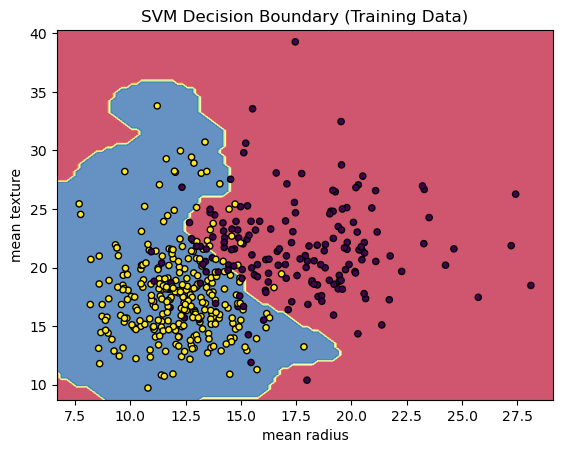

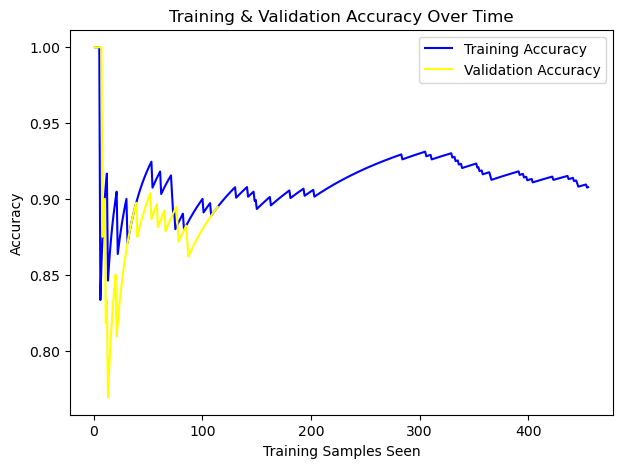

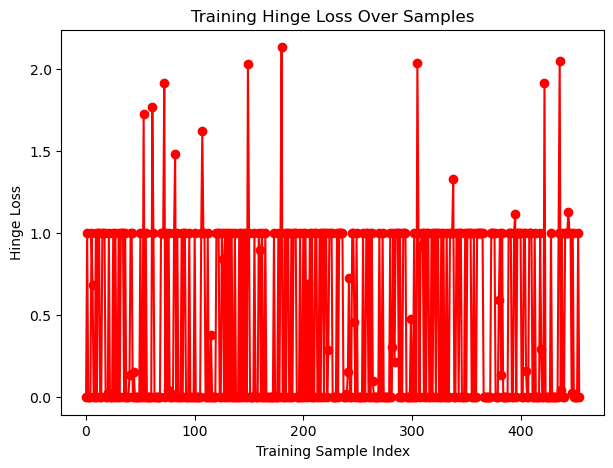

In [9]:
# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data[:, :2]  # Select first two features for visualization (Average size, Variation in grayscale intensity of the tumor)
y = cancer.target  # Binary labels (0 = malignant, 1 = benign)

# Split dataset into 80% training and 20% validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the SVM model with RBF kernel (Radial Basis Function)
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

# Train the model
svm.fit(X_train, y_train)

# Make predictions for training and validation sets
y_train_pred = svm.predict(X_train)
y_val_pred = svm.predict(X_val)

# Compute accuracy for training and validation sets
train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Validation Accuracy: {val_accuracy:.2f}")

# Compute hinge loss for training samples
# This method returns the decision function values for each training sample in the dataset (X_train).
decision_values = svm.decision_function(X_train)
# Compute hinge loss,0 If the prediction is correct and confident, If the prediction is incorrect, or the model is unsure, the loss will increase.
hinge_losses = np.maximum(0, 1 - y_train * decision_values) 

# Generate Accuracy Values for Plotting
epochs = np.arange(1, len(y_train_pred) + 1)  # Simulated epochs (1 per sample)
#print(epochs)
train_acc_values = np.cumsum(y_train_pred == y_train) / epochs  # Cumulative accuracy
val_acc_values = np.cumsum(y_val_pred == y_val) / np.arange(1, len(y_val_pred) + 1)  # Cumulative validation accuracy

# Plot Decision Boundary
plt.figure(figsize=(7, 5))  # Adjust figure size for better visualization
DecisionBoundaryDisplay.from_estimator(
    svm,
    X_train,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors="k")
plt.title("SVM Decision Boundary (Training Data)")
plt.show()

# Plot Training & Validation Accuracy
plt.figure(figsize=(7, 5))  # Adjust figure size for better visualization
plt.plot(epochs, train_acc_values, label="Training Accuracy", color="blue")
plt.plot(np.arange(1, len(y_val_pred) + 1), val_acc_values, label="Validation Accuracy", color="yellow")
plt.xlabel("Training Samples Seen")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy Over Time")
plt.show()

# Plot Hinge Loss
plt.figure(figsize=(7, 5))  # Adjust figure size for better visualization
plt.plot(range(len(hinge_losses)), hinge_losses, marker='o', linestyle='-', color='red')
plt.xlabel("Training Sample Index")
plt.ylabel("Hinge Loss")
plt.title("Training Hinge Loss Over Samples")
plt.show()